In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
data = pd.read_csv('winequality-red.csv',';') 
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


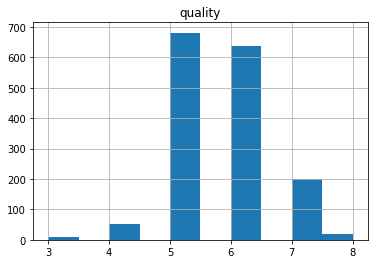

In [4]:
# 1a
a = data.hist(column='quality')
# Continuous: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, density, pH, sulphates, alcohol
# Discrete: free sulfur dioxide, total sulfur dioxide, quality

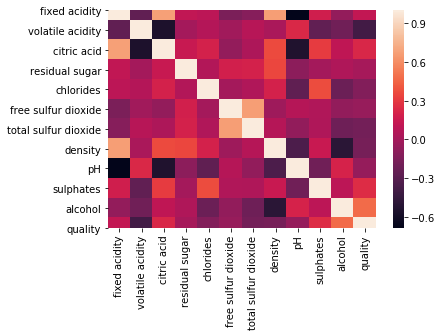

In [5]:
# 1b
b = sns.heatmap(data.corr())
# The diagonal is 1 because correlation of two columns that are the same will be directly/exactly correlated with each other.

In [6]:
# 1c
c = list(data.corr().quality.abs().sort_values(ascending=False).iloc[1:6].index)
c

['alcohol',
 'volatile acidity',
 'sulphates',
 'citric acid',
 'total sulfur dioxide']

In [7]:
# 1d
pos = list(data.corr().quality.sort_values(ascending=False).iloc[1:3].index)
neg = list(data.corr().quality.sort_values(ascending=True).iloc[0:2].index)
d = pos + neg
d

['alcohol', 'sulphates', 'volatile acidity', 'total sulfur dioxide']

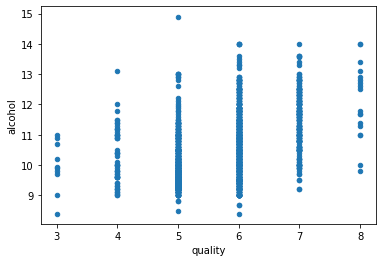

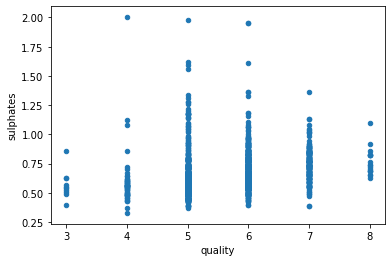

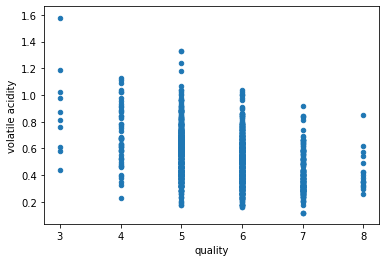

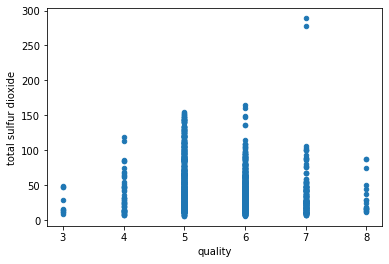

In [8]:
# 2a
for feature in range(len(d)):
    data.plot(kind='scatter', x = 'quality', y = d[feature])

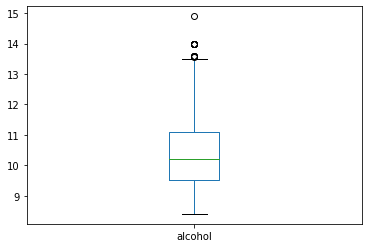

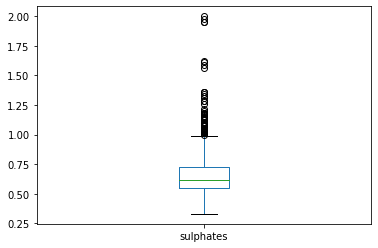

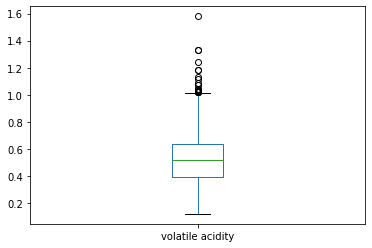

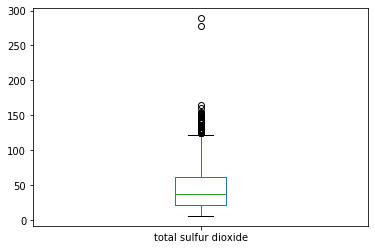

In [9]:
# 2b
for feature in range(len(d)):
    data.plot(kind='box', y = d[feature])

In [10]:
# 3a
stats = data.mean().to_frame().T.rename(index={0:'mean'}).append(data.std().to_frame().T.rename(index={0:'std'}))
stats

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569


In [11]:
# 3b
for column in data.columns:
    upper = stats.iloc[0][column] + 3 * stats.iloc[1][column]
    lower = stats.iloc[0][column] - 3 * stats.iloc[1][column]
    data.loc[data[column] > upper, column] = np.nan
    data.loc[data[column] < lower, column] = np.nan
data.isna().sum().to_frame().T.rename(index={0:'count'})

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,12,10,1,30,31,22,15,18,8,27,8,10


In [12]:
# 3c
mean_impute_data = data
median_impute_data = data

for column in data.columns:
    mean = data[column].mean()
    median = data[column].median()
    mean_impute_data.loc[data[column].isna(), column] = mean
    median_impute_data.loc[data[column].isna(), column] = median
    
median_impute_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


In [13]:
mean_impute_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


In [14]:
# 4a
x = data[['density', 'alcohol']]
y = data['quality']
reg = LinearRegression().fit(x, y)
theta0 = reg.intercept_
theta1 = reg.coef_[0]
theta2 = reg.coef_[1]

theta0, theta1, theta2
# θ0 is the y-intercept, θ1 is the coefficient of the density, θ2 is the coefficient of the alcohol
# The coefficients tell us the weight of each feature when making a prediction.

(-35.291230078841025, 36.97852411871224, 0.39273653519094237)

In [15]:
# 4b
x = np.array(data['density']).reshape(-1,1)
y = data['quality']
reg = LinearRegression().fit(x, y)
theta0 = reg.intercept_
theta1 = reg.coef_[0]

theta0, theta1
# Since there are less features being used to predict, there will be more weight on the other features. 

(76.75408563111203, -71.33466654449114)

In [16]:
# 4c
x = data.drop(columns = ['quality'])
y = data['quality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=False)
reg = LinearRegression().fit(x_train, y_train)
test_pred = reg.predict(x_test)
train_pred = reg.predict(x_train)
train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

train_mse, test_mse

# I have training error < testing error which meant that the model performed better on the training.
# I am unsure whether the any sets performed too well, but a reason that the training set could've performed better
# is because the model was created based on the training data, so there would obviously be less error.
# Sklearn also uses the training data to create a linear model with the minimal Residual Sum of Squares (RSS) which
# where MSE =  1 / N * RSS where N is the degrees of freedom. So Sklearn is also creating a linear model with the
# minimal MSE for the training data which is why the training error < testing error.

(0.3858438033470495, 0.4129198064918585)

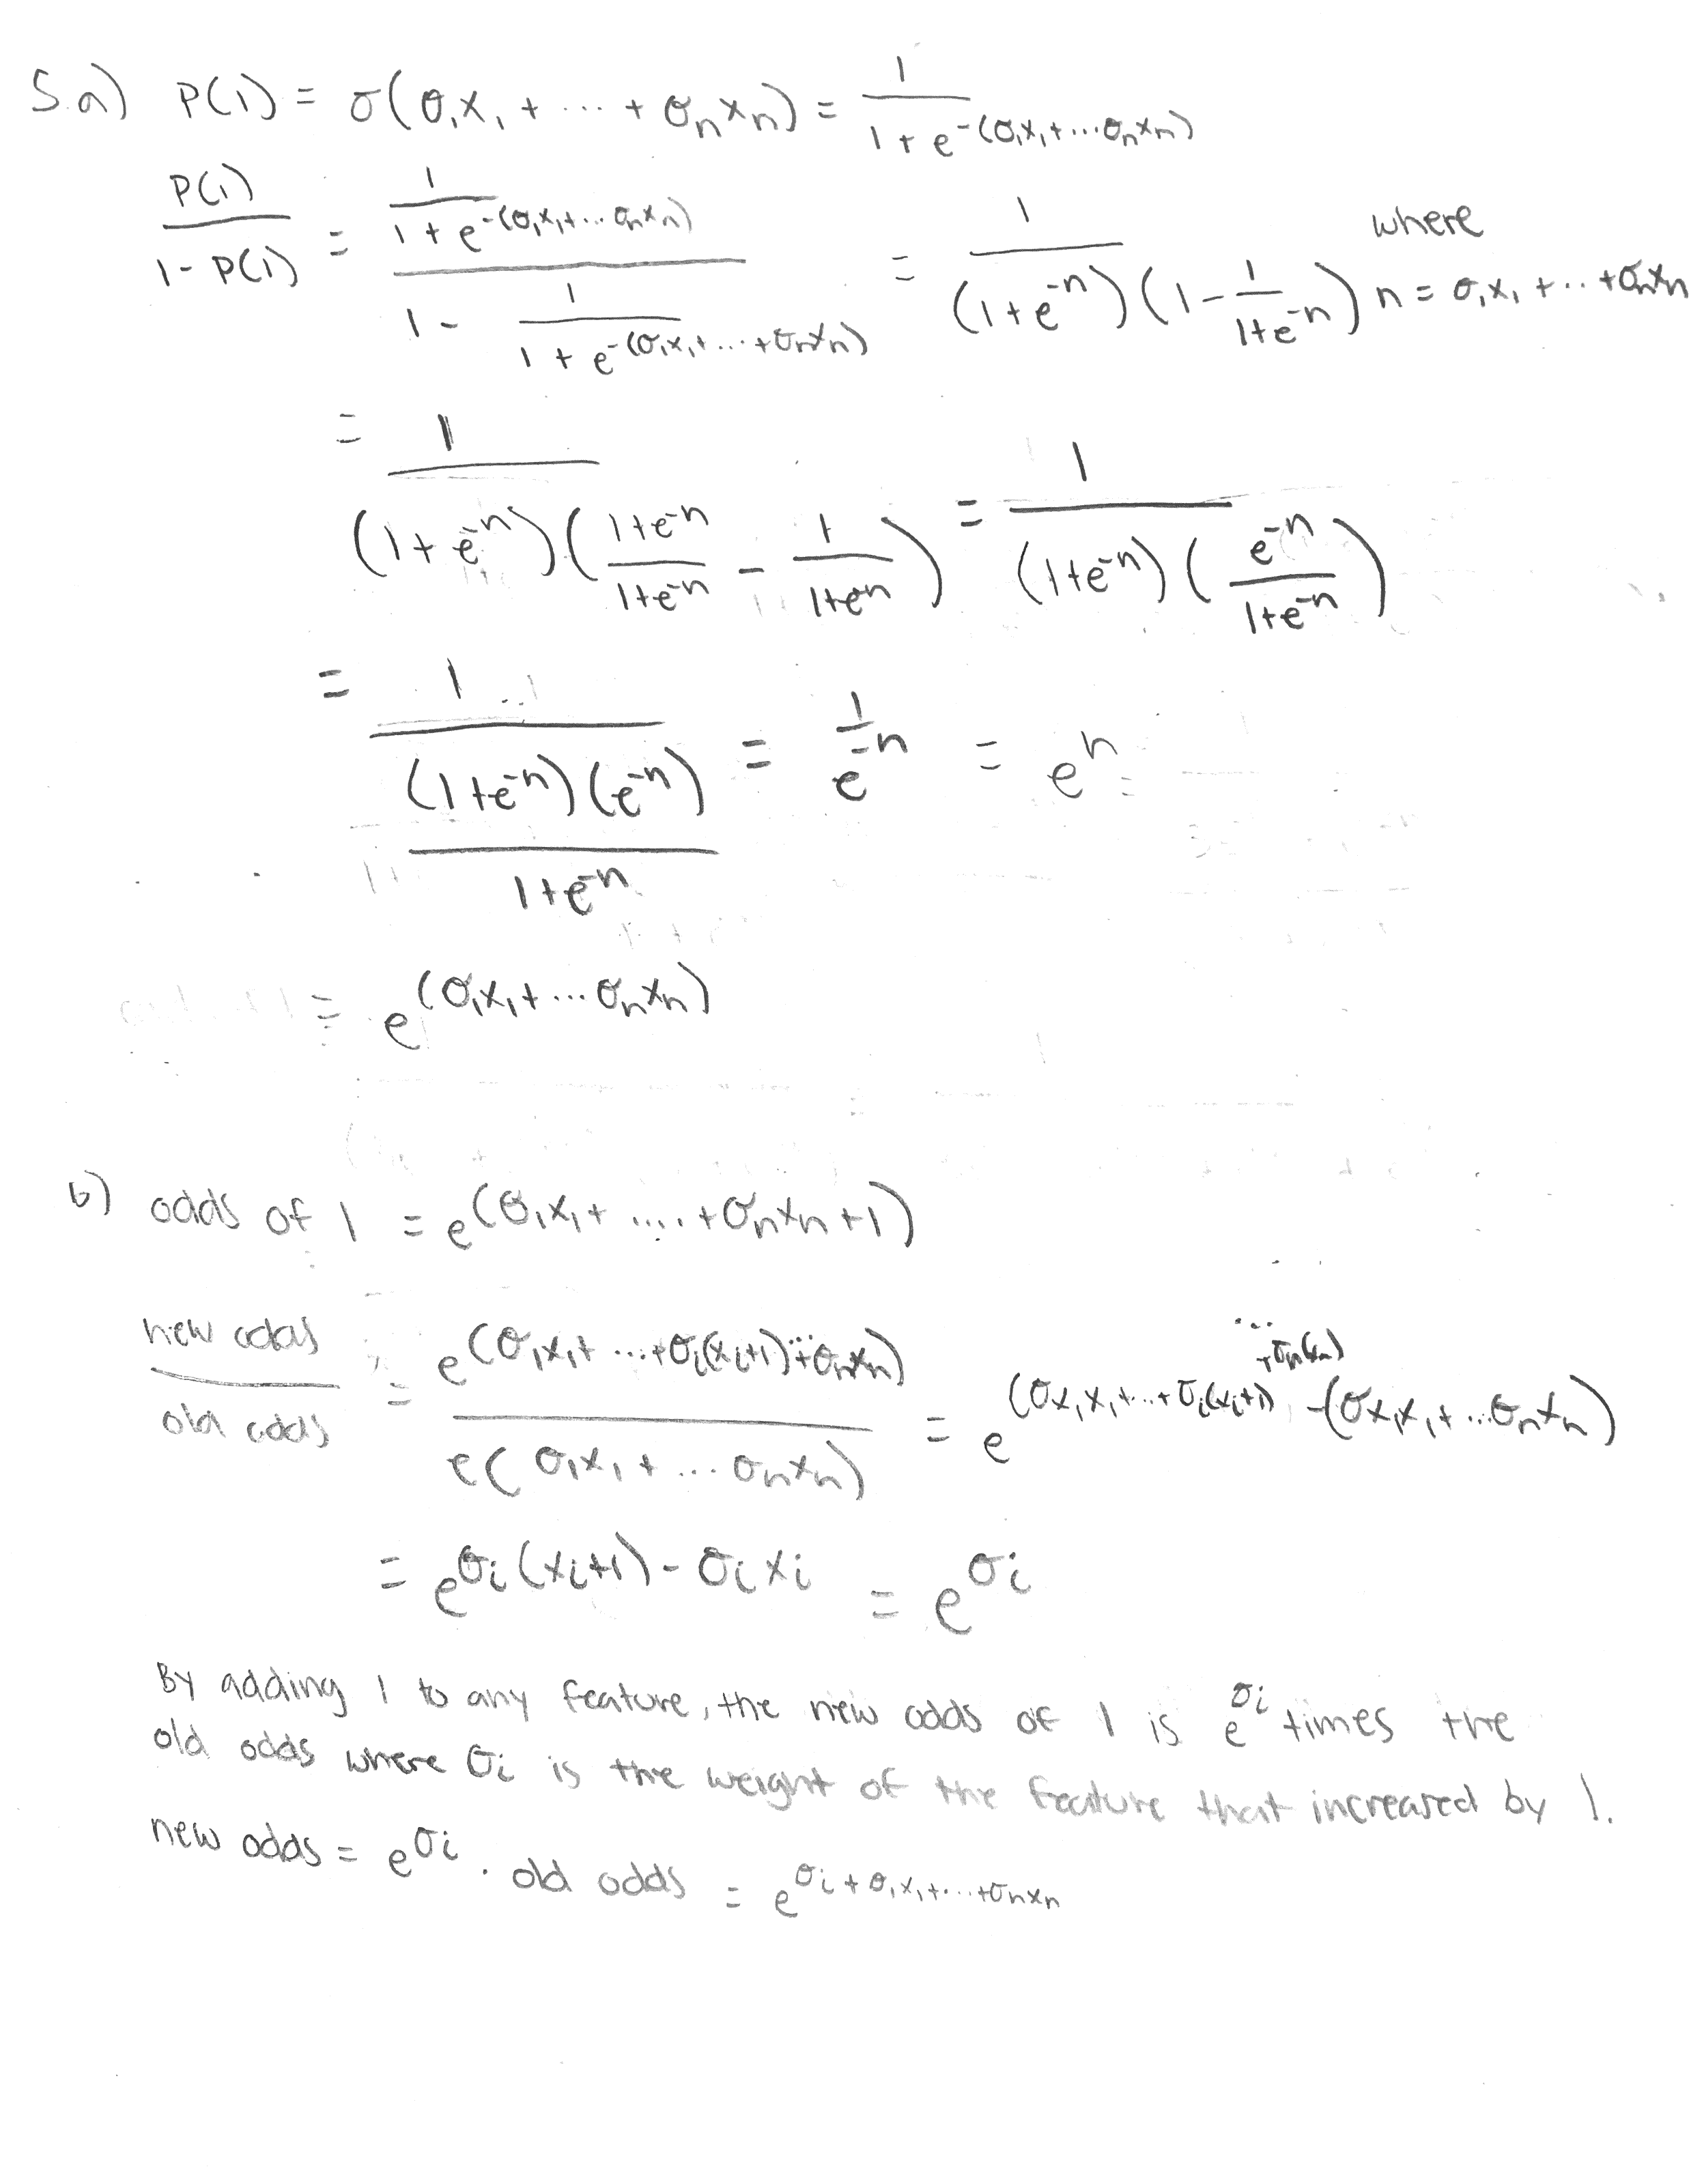

In [20]:
from IPython.display import Image
Image(filename='picture.png', unconfined=False)